In [1]:
import matplotlib.pyplot as plt


## Parsing proza.ru

TODO сколько авторов, сколько знаков на автора, статистика по кол-ву рецнзий?

**Цель**: собрать корпус средней и плохой литературы.

Требования:
* Объем ~100 романов ~100 Мб

* Только фэнтези

* Разделение произведения на фреймы не слишком большого размера чтобы можно было join'ить фрейм с самим собой

* В начале фрейма указать мета-информацию: оценки произведения с сайта т.к. оценки, вероятно, коррелируют с количеством ошибок в тексте

**Результат**:
* Загружено 81 произведение жанра фэнтези

* Суммарный объем - 177 Мб

* 33 автора

* Каждое произведение размером больше 1 Мб

* Произведение разбито на фреймы. Каждый не больше 20 тысяч символов

* Оценки на proza.ru не нашел. Нашел рейтинг, в котором только 1000 произведений.
Вместо оценок указал количество рецензий, написанных пользователями на это произведение. Также указал статистику на странице автора.

Статистика автора содержит 
* Количество читателей

* Количество публикаций

* Количество рецензий, написанных на произведения автора

* Количество рецензий, написанных автором

##### Информация по авторам

auth_reviews_sent_count is None если на странице автора не указаны рецнзии, написанные им

In [2]:
authors_info = {'/avtor/alanaenoch': {'auth_publication_count': 173, 'auth_reviews_received_count': 261,
                                      'auth_reviews_sent_count': 147, 'auth_readers_count': 52683,
                                      'dumped_total_len': 11811535, 'dumped_cnt': 4},
                '/avtor/klodia1': {'auth_publication_count': 58, 'auth_reviews_received_count': 2,
                                   'auth_reviews_sent_count': None, 'auth_readers_count': 2737,
                                   'dumped_total_len': 845807, 'dumped_cnt': 1},
                '/avtor/dinna2': {'auth_publication_count': 66, 'auth_reviews_received_count': 35,
                                  'auth_reviews_sent_count': 10, 'auth_readers_count': 5283,
                                  'dumped_total_len': 3354356, 'dumped_cnt': 3},
                '/avtor/likaakadianka': {'auth_publication_count': 111, 'auth_reviews_received_count': 4,
                                         'auth_reviews_sent_count': 11, 'auth_readers_count': 9380,
                                         'dumped_total_len': 1212689, 'dumped_cnt': 1},
                '/avtor/ulissu': {'auth_publication_count': 205, 'auth_reviews_received_count': 153,
                                  'auth_reviews_sent_count': 76, 'auth_readers_count': 29020,
                                  'dumped_total_len': 3318007, 'dumped_cnt': 3},
                '/avtor/trelly': {'auth_publication_count': 169, 'auth_reviews_received_count': 127,
                                  'auth_reviews_sent_count': 125, 'auth_readers_count': 16619,
                                  'dumped_total_len': 7872214, 'dumped_cnt': 7},
                '/avtor/yahsma': {'auth_publication_count': 499, 'auth_reviews_received_count': 87,
                                  'auth_reviews_sent_count': None, 'auth_readers_count': 35083,
                                  'dumped_total_len': 3720774, 'dumped_cnt': 2},
                '/avtor/radchenkoxenia': {'auth_publication_count': 246, 'auth_reviews_received_count': 22,
                                          'auth_reviews_sent_count': None, 'auth_readers_count': 9827,
                                          'dumped_total_len': 1689303, 'dumped_cnt': 1},
                '/avtor/rasskazchik': {'auth_publication_count': 413, 'auth_reviews_received_count': 90,
                                       'auth_reviews_sent_count': 9, 'auth_readers_count': 63033,
                                       'dumped_total_len': 1076837, 'dumped_cnt': 1},
                '/avtor/sharl1': {'auth_publication_count': 169, 'auth_reviews_received_count': 1004,
                                  'auth_reviews_sent_count': 392, 'auth_readers_count': 37068,
                                  'dumped_total_len': 776296, 'dumped_cnt': 1},
                '/avtor/login185': {'auth_publication_count': 267, 'auth_reviews_received_count': 1031,
                                    'auth_reviews_sent_count': 507, 'auth_readers_count': 95734,
                                    'dumped_total_len': 1489929, 'dumped_cnt': 1},
                '/avtor/visay1': {'auth_publication_count': 62, 'auth_reviews_received_count': 4,
                                  'auth_reviews_sent_count': None, 'auth_readers_count': 7117,
                                  'dumped_total_len': 737555, 'dumped_cnt': 1},
                '/avtor/xeniakostina': {'auth_publication_count': 256, 'auth_reviews_received_count': 23,
                                        'auth_reviews_sent_count': None, 'auth_readers_count': 13273,
                                        'dumped_total_len': 2555939, 'dumped_cnt': 1},
                '/avtor/areteiny': {'auth_publication_count': 214, 'auth_reviews_received_count': 23,
                                    'auth_reviews_sent_count': 34, 'auth_readers_count': 13374,
                                    'dumped_total_len': 2099152, 'dumped_cnt': 1},
                '/avtor/cooler1': {'auth_publication_count': 289, 'auth_reviews_received_count': 70,
                                   'auth_reviews_sent_count': None, 'auth_readers_count': 61467,
                                   'dumped_total_len': 2072565, 'dumped_cnt': 1},
                '/avtor/iandri': {'auth_publication_count': 77, 'auth_reviews_received_count': 21,
                                  'auth_reviews_sent_count': 9, 'auth_readers_count': 19933,
                                  'dumped_total_len': 1086876, 'dumped_cnt': 1},
                '/avtor/lenderia': {'auth_publication_count': 69, 'auth_reviews_received_count': 8,
                                    'auth_reviews_sent_count': 22, 'auth_readers_count': 4269,
                                    'dumped_total_len': 781890, 'dumped_cnt': 1},
                '/avtor/lvstef': {'auth_publication_count': 91, 'auth_reviews_received_count': 18,
                                  'auth_reviews_sent_count': 7, 'auth_readers_count': 8978, 'dumped_total_len': 1537760,
                                  'dumped_cnt': 1},
                '/avtor/sovichev': {'auth_publication_count': 99, 'auth_reviews_received_count': 13,
                                    'auth_reviews_sent_count': None, 'auth_readers_count': 7507,
                                    'dumped_total_len': 827139, 'dumped_cnt': 1},
                '/avtor/shuburshunchik': {'auth_publication_count': 58, 'auth_reviews_received_count': 33,
                                          'auth_reviews_sent_count': 23, 'auth_readers_count': 4752,
                                          'dumped_total_len': 825823, 'dumped_cnt': 1},
                '/avtor/zzaaz': {'auth_publication_count': 275, 'auth_reviews_received_count': 249,
                                 'auth_reviews_sent_count': 605, 'auth_readers_count': 78352,
                                 'dumped_total_len': 2917226, 'dumped_cnt': 2},
                '/avtor/molvad': {'auth_publication_count': 285, 'auth_reviews_received_count': 61,
                                  'auth_reviews_sent_count': None, 'auth_readers_count': 51387,
                                  'dumped_total_len': 3321780, 'dumped_cnt': 4},
                '/avtor/khrisevian': {'auth_publication_count': 246, 'auth_reviews_received_count': 67,
                                      'auth_reviews_sent_count': 4, 'auth_readers_count': 110585,
                                      'dumped_total_len': 4077475, 'dumped_cnt': 4},
                '/avtor/anarhoret': {'auth_publication_count': 576, 'auth_reviews_received_count': 4133,
                                     'auth_reviews_sent_count': 4673, 'auth_readers_count': 149096,
                                     'dumped_total_len': 28410091, 'dumped_cnt': 15},
                '/avtor/aleksandr': {'auth_publication_count': 249, 'auth_reviews_received_count': 573,
                                     'auth_reviews_sent_count': 214, 'auth_readers_count': 75737,
                                     'dumped_total_len': 721618, 'dumped_cnt': 1},
                '/avtor/buzman39': {'auth_publication_count': 79, 'auth_reviews_received_count': 37,
                                    'auth_reviews_sent_count': 32, 'auth_readers_count': 3374,
                                    'dumped_total_len': 867475, 'dumped_cnt': 1},
                '/avtor/russbarbarian': {'auth_publication_count': 142, 'auth_reviews_received_count': 22,
                                         'auth_reviews_sent_count': 21, 'auth_readers_count': 13541,
                                         'dumped_total_len': 1225847, 'dumped_cnt': 1},
                '/avtor/lanter': {'auth_publication_count': 88, 'auth_reviews_received_count': 432,
                                  'auth_reviews_sent_count': 328, 'auth_readers_count': 27599,
                                  'dumped_total_len': 1030921, 'dumped_cnt': 1},
                '/avtor/mizinatamara': {'auth_publication_count': 135, 'auth_reviews_received_count': 299,
                                        'auth_reviews_sent_count': 358, 'auth_readers_count': 30174,
                                        'dumped_total_len': 1352121, 'dumped_cnt': 1},
                '/avtor/villi1': {'auth_publication_count': 247, 'auth_reviews_received_count': 575,
                                  'auth_reviews_sent_count': 841, 'auth_readers_count': 61930,
                                  'dumped_total_len': 773291, 'dumped_cnt': 1},
                '/avtor/antonim': {'auth_publication_count': 83, 'auth_reviews_received_count': 71,
                                   'auth_reviews_sent_count': 21, 'auth_readers_count': 56967,
                                   'dumped_total_len': 3161351, 'dumped_cnt': 1},
                '/avtor/maylin': {'auth_publication_count': 181, 'auth_reviews_received_count': 113,
                                  'auth_reviews_sent_count': 107, 'auth_readers_count': 71242,
                                  'dumped_total_len': 2296632, 'dumped_cnt': 1},
                '/avtor/josedalais': {'auth_publication_count': 180, 'auth_reviews_received_count': 141,
                                      'auth_reviews_sent_count': 3, 'auth_readers_count': 60887,
                                      'dumped_total_len': 3913467, 'dumped_cnt': 3}}

pub_cnts = [173, 58, 66, 111, 205, 169, 499, 246, 413, 169, 267, 62, 256, 214, 289, 77, 69, 91, 99, 58, 275, 285, 246,
            576, 249, 79, 142, 88, 135, 247, 83, 181, 180]
rev_rcvd_cnts = [261, 2, 35, 4, 153, 127, 87, 22, 90, 1004, 1031, 4, 23, 23, 70, 21, 8, 18, 13, 33, 249, 61, 67, 4133,
                 573, 37, 22, 432, 299, 575, 71, 113, 141]
rev_sent_cnts = [147, None, 10, 11, 76, 125, None, None, 9, 392, 507, None, None, 34, None, 9, 22, 7, None, 23, 605,
                 None, 4, 4673, 214, 32, 21, 328, 358, 841, 21, 107, 3]
readers_cnts = [52683, 2737, 5283, 9380, 29020, 16619, 35083, 9827, 63033, 37068, 95734, 7117, 13273, 13374, 61467,
                19933, 4269, 8978, 7507, 4752, 78352, 51387, 110585, 149096, 75737, 3374, 13541, 27599, 30174, 61930,
                56967, 71242, 60887]

#### Статистика

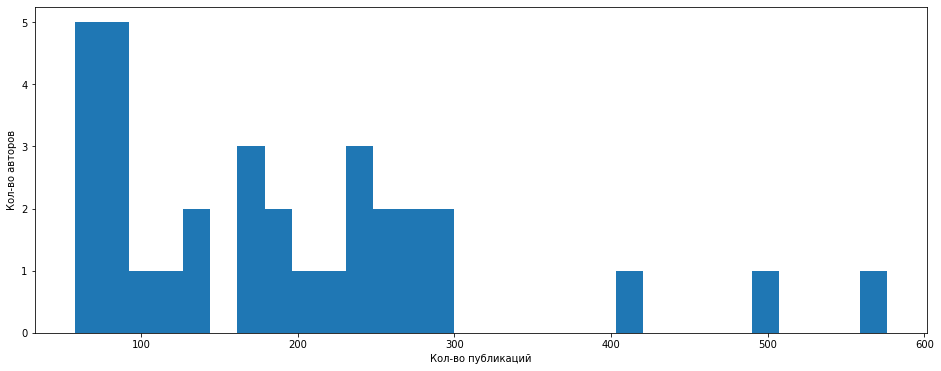

In [3]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.hist(pub_cnts, 30)
plt.xlabel("Кол-во публикаций")
plt.ylabel("Кол-во авторов")
plt.show()




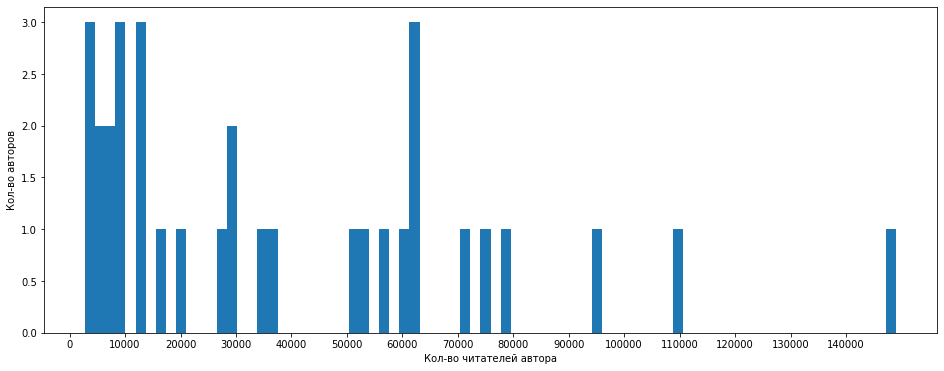

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.xticks(range(0,150000,10000))
ax.hist(readers_cnts, 80)
plt.xlabel("Кол-во читателей автора")
plt.ylabel("Кол-во авторов")
plt.show()

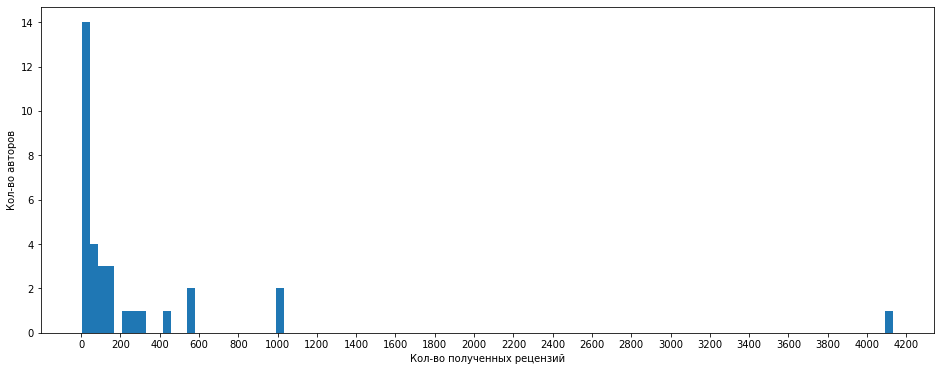

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.xticks(range(0,5000,200))
ax.hist(rev_rcvd_cnts, 100)
plt.xlabel("Кол-во полученных рецензий")
plt.ylabel("Кол-во авторов")
plt.show()



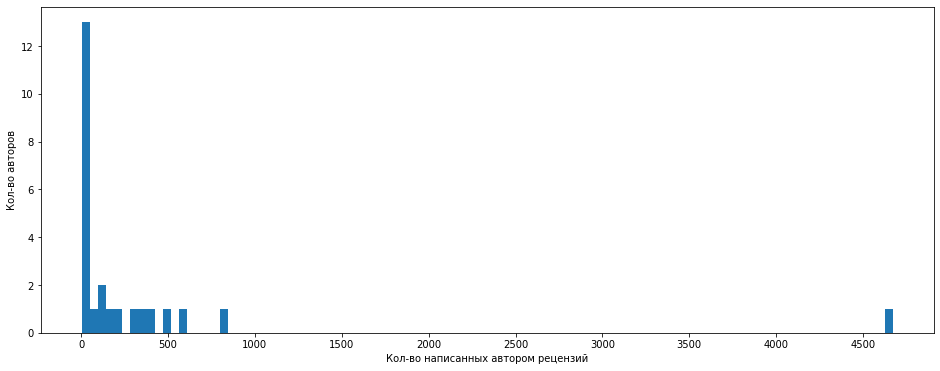

In [10]:
noneless = [x for x in rev_sent_cnts if x is not None]
fig, ax = plt.subplots(figsize=(16, 6))
plt.xticks(range(0,5000,500))
ax.hist(noneless, 100)
plt.xlabel("Кол-во написанных автором рецензий")
plt.ylabel("Кол-во авторов")
plt.show()


In [15]:
for a, i in authors_info.items():
    if i['auth_reviews_sent_count'] and  i['auth_reviews_sent_count']>4000:
        print(a)

/avtor/anarhoret


https://proza.ru/avtor/anarhoret - написал 4500 рецензий 0_о.